In [1]:
from pyALT import *
import pyALT.io as io
from matplotlib import pyplot as plt
G = io.load('meso_cortex.pk')

In [68]:
L = ALT(G)
thresholds = {'VISp':4,'AUDp':1,'GU':2.5,'SSp-ul':2.5,'SSp-tr':2.5,
              'SSp-m':4,'SSp-bfd':4,'SSp-ll':1.5,'SSp-n':0.98,'MOB':0.46}
srcs = ['SSp-n','AUDp','VISp','GU','SSp-ul','SSp-tr','SSp-m','SSp-bfd','SSp-ll','MOB']
for src in srcs:
    L.add_source(src)
    L.set_theta(src,0.98)
L.set_theta('MOB',0.46)
L.run()
L.form_paths()
pc = L.path_centrality()
core = L.core(90)

In [69]:
core_nodes = [xx[0] for xx in core]
core_nodes

['CLA', 'PTLp', 'AUDv', 'SSs', 'AOB', 'MOs', 'ACAd', 'VISl', 'ECT']

In [70]:
from collections import defaultdict,Counter

In [71]:
E = defaultdict(int)
EV = defaultdict(list)
for src in srcs:
    adag = L(src)
    for v,w in adag.edges():
        E[(v,w)]+=1
for v,w in G.edges():
    E[(v,w)]+=0
F = defaultdict(float)
for v,w in G.edges():
    k = E[(v,w)]
    EV[k]+=[(G[v][w]['weight'],G[v][w]['distance'])]
C = Counter(E.values())
for v,w in G.edges():
    k = E[(v,w)]
    nk = C[k]
    if (v in core_nodes) or (w in core_nodes):
        F[k] += 1.0/nk

In [83]:
ng = G.size()
print('"Presence"','"Number of edges"','"Fraction connected to 90% core"')
for k in range(11):
    print(k,C[k],f'{F[k]:.2f}')

"Presence" "Number of edges" "Fraction connected to 90% core"
0 332 0.28
1 127 0.39
2 60 0.42
3 37 0.41
4 16 0.56
5 12 0.67
6 13 0.54
7 3 0.67
8 6 0.67
9 8 0.25
10 2 0.50


In [46]:
a,b = [],[]
for w in range(11):
    tmp = EV[w]
    ws = [xx[0] for xx in tmp]
    ls = [xx[1]/1000 for xx in tmp]
    a+= [ws]
    b+=[ls]

Text(0,0.5,'Edge length distribution')

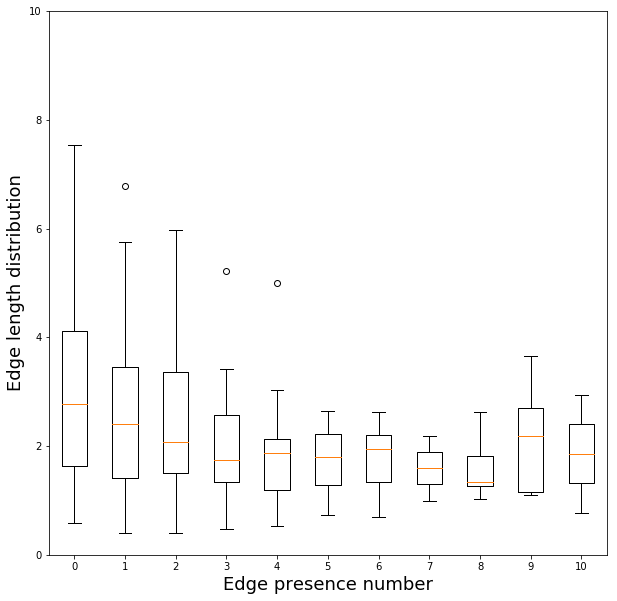

In [93]:
fig1, ax = plt.subplots(figsize=(10,10))
ax.boxplot(b)
ax.set_xticklabels(range(11))
ax.set_ylim([0,10])
ax.set_xlabel('Edge presence number',fontsize=18)
ax.set_ylabel('Edge length distribution',fontsize=18)

In [90]:
print('From','To','"Presence number"')
for w in E:
    if E[w]>9:
        print(w[0],w[1],E[w])
for w in E:
    if E[w]==9:
        print(w[0],w[1],E[w])

From To "Presence number"
PERI CA2 10
VISl VISpl 10
AIv DP 9
AIv TT 9
AON MOB 9
TT AON 9
CLA EPd 9
CLA TT 9
PERI SUBd 9
POST PRE 9


(0, 10)

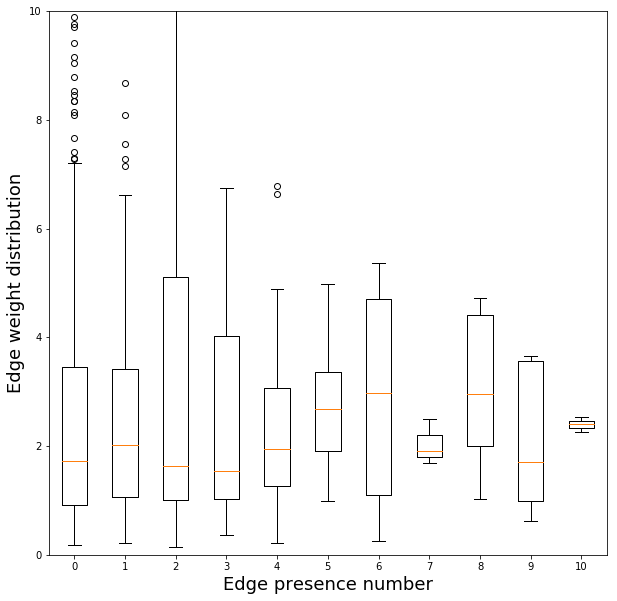

In [94]:
fig1, ax = plt.subplots(figsize=(10,10))
ax.boxplot(a)
ax.set_xticklabels(range(11))
ax.set_ylim([0,10])
ax.set_xlabel('Edge presence number',fontsize=18)
ax.set_ylabel('Edge weight distribution',fontsize=18)
ax.set_ylim([0,10])